# El Problema de los Tres Cuerpos
Por: Daniel Martínez y Fernanda Pérez

### 1. Introducción

Uno de los problemas físicos que continúan abiertos hasta la actualidad es el *problema de los tres cuerpos*, que consiste en resolver las ecuaciones de movimiento de tres cuerpos sometidos a sus campos gravitacionales. El carácter irresoluble de las ecuaciones hizo que durante 300 años físicos y matemáticos intensaen encontrar una solución en términos de funciones fundamentales, pero tal cosa nunca ocurrió. 

Newton ofreció, en 1665, una solución aproximada al sistema formado por la Tierra, la Luna y el Sol. Sus conclusiones concordaban con los datos experimentales en un 92%. Euler (1767) y Lagrange (1772) hicieron lo propio aportando soluciones particulares al problema general.

### 2. Ecuaciones de Movimiento

Las ecucaciones de movimiento se reescriben como un sistema de ecuaciones de segundo orden acopladas:

$\dot{\vec{x_1}} = \vec{v_1}$

$\dot{\vec{x_2}} = \vec{v_2}$

$\dot{\vec{x_3}} = \vec{v_3}$

$\dot{\vec{v_1}} = G \frac{m_2}{||\vec{x_1} - \vec{x_2}||^3} (\vec{x_1} - \vec{x_2})  + G \frac{m_3}{||\vec{x_1} - \vec{x_3}||^3} (\vec{x_1} - \vec{x_3}) $

$\dot{\vec{v_2}} = G \frac{m_1}{||\vec{x_2} - \vec{x_1}||^3} (\vec{x_2} - \vec{x_1})  + G \frac{m_3}{||\vec{x_2} - \vec{x_3}||^3} (\vec{x_2} - \vec{x_3}) $

$\dot{\vec{v_3}} = G \frac{m_1}{||\vec{x_1} - \vec{x_3}||^3} (\vec{x_1} - \vec{x_3})  + G \frac{m_2}{||\vec{x_3} - \vec{x_2}||^3} (\vec{x_3} - \vec{x_2}) $

Como método de integración, elegimos una versión modificada del Método de Taylor, valiéndonos de la paquetería ```TaylorSeries.jl```. Todo ha sido escrito en un archivo adicional llamado ```ProyectoFinal.jl```, donde se incluyen funciones necesarias para las animaciones.

### 3.  Órbitas Periódicas

Para la resolución de las ecuaciones de movimiento, se eligieron sets de condiciones iniciales. Posteriormente se hicieron variaciones pequeñas de una condición inicial (por ejemplo la velocidad de arranque del tercer cuerpo) y se dispusieron en un gráfico coloreado según su valor. Del patrón de posiciones hallados en los gráficos, se eligieron los valores iniciales que consideramos contruían una trayectoria "estable" al rededor del sistema, para realizar una animación.

### 4.  Cálculo de la Energía

Como una estimación de la energía del sistema, calcualmos:


## Sistema Sol - Tierra - Luna

Para el sistema de 3 cuerpos formado por el Sol, la Tierra y la Luna, consideramos una posición inicial colineal, con las distancias equivalentes a las distancias astronómicas reportadas.

Usamos también datos concernientes a las masas.

In [2]:
include("ProyectoFinal.jl") #Importamos las funciones que escribimos

Energia_3 (generic function with 1 method)

In [82]:
MasaSol = 1. #En Unidades Astronomicas
#MasaTierra = 0.0003015
#MasaLuna = 0.00000037
MasaTierra = 3.3e-5
MasaLuna = 2.7e-7

Distancia_TierraSol = 1.
Distancia_TierraLuna = 0.002577181
Distancia_LunaSol_inicial= Distancia_TierraSol + Distancia_TierraLuna

VelocidadTraslacional_TierraSol = 1.
VelocidadTraslacional_TierraLuna = 0.002
VelocidadLuna_inicial = VelocidadTraslacional_TierraSol + VelocidadTraslacional_TierraLuna

PosicionInicialSol = [0., 0., 0.]
PosicionInicialTierra = [Distancia_TierraSol, 0., 0.]
PosicionInicialLuna = [Distancia_LunaSol_inicial, 0., 0.] ;

In [83]:
#Funcion que agrupa condiciones iniciales para pasarlas al integrador
function iniciar(masa, posiciones, velocidades)
    condiciones = [masa, posiciones[1], posiciones[2], posiciones[3], velocidades[1], velocidades[2], velocidades[3]]
    return condiciones
end

iniciar (generic function with 1 method)

In [84]:
#Condiciones Iniciales

CondicionesSol = iniciar(MasaSol, PosicionInicialSol, [0.,0.,0.,])
CondicionesTierra = iniciar(MasaTierra, PosicionInicialTierra, [0., VelocidadTraslacional_TierraSol, 0.])
CondicionesLuna   = iniciar(MasaLuna, PosicionInicialLuna, [0., VelocidadLuna_inicial, 0.])

#Agrupamos Todo

CondicionesIniciales = typeof(CondicionesSol)[CondicionesSol, CondicionesTierra, CondicionesLuna];

In [85]:
#importamos colores y hacemos un color map que disntiguira a nuestro tercer cuerpo: la Luna

using Colors

#### Vamos a variar las condiciones de la velocidad inicial del Satélite, en el eje Y.
#### Para ello, graficamos las coordenadas obtenidas en X y en Y, asignándoles un colorsegún el parámetro del cual provengan. (El círculo azul marino oscuro al centro corresponde a las posiciones del segundo cuerpo, la Tierra. Como es de esperarse orbita al rededor del Sol.

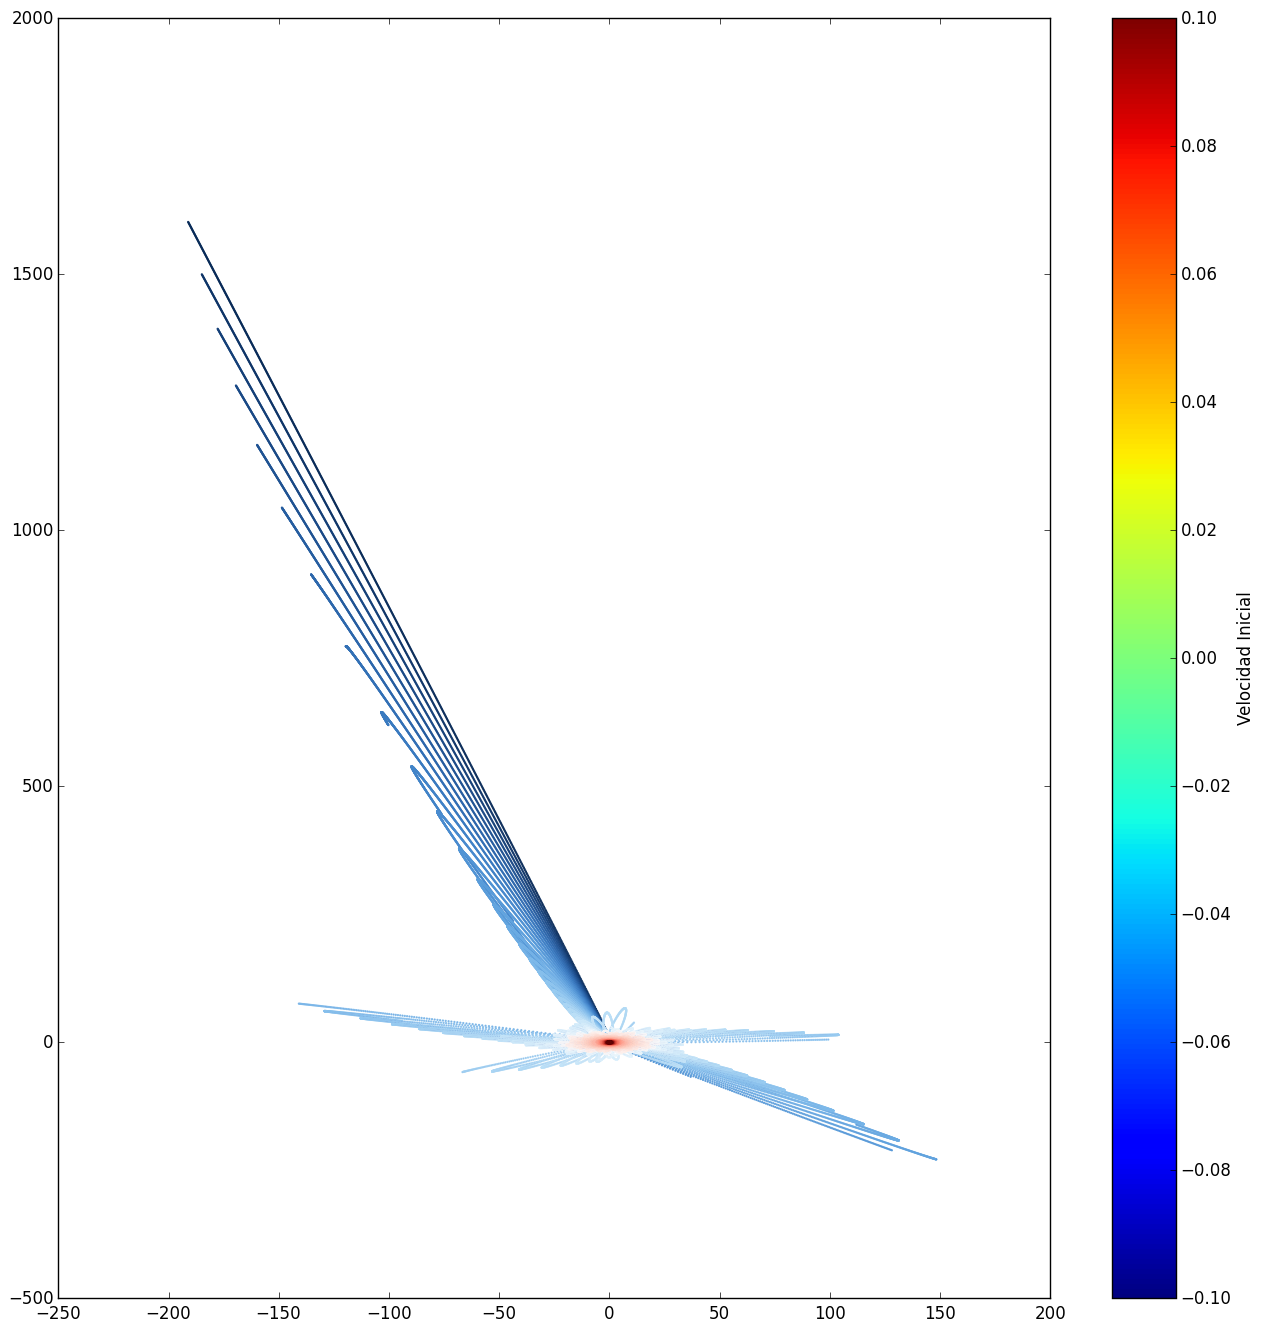

In [92]:
par = [3.0:-0.05:0.0] #definimos un parámetro de variación
paleta_luna = colormap("RdBu", length(par))

fig = figure("Title of Window",figsize=(16,16))
for i in 1:length(par)
    
    CondicionesLuna = iniciar(MasaLuna, PosicionInicialLuna, [0., VelocidadTraslacional_TierraSol+par[i], 0.])
    CondicionesIniciales = typeof(CondicionesSol)[CondicionesSol, CondicionesTierra, CondicionesLuna]
    t, Cuerpo1, Cuerpo2, Cuerpo3 = Integrador3(CondicionesIniciales, 1000.)
    
    Px1 = [pos[1] for pos in Cuerpo1[1]] 
    Px2 = [pos[1] for pos in Cuerpo2[1]]
    Px3 = [pos[1] for pos in Cuerpo3[1]]
    
    Py1 = [pos[2] for pos in Cuerpo1[1]] 
    Py2 = [pos[2] for pos in Cuerpo2[1]]
    Py3 = [pos[2] for pos in Cuerpo3[1]]

    Pz1 = [pos[3] for pos in Cuerpo1[1]] 
    Pz2 = [pos[3] for pos in Cuerpo2[1]]
    Pz3 = [pos[3] for pos in Cuerpo3[1]]
    
    Energia_3(Cuerpo1, Cuerpo2, Cuerpo3, [MasaSol, MasaTierra, MasaLuna]) 
    c_par = [ones(Py3)*par[i]]
    o = paleta_luna[length(paleta_luna)-i+1]
    rgb_o = [comp1(o), comp2(o), comp3(o)]
    
    p1=scatter(Px1, Py1, marker=".", s=0.6, color = "red", label="Sol")
    p2=scatter(Px2, Py2, linestyle="-", marker=".", s=0.4, color = "blue", label="Tierra")
    p3=scatter(Px3, Py3, c=c_par, color=rgb_o, marker=".", s=1.5, label="Luna")
    
    #show()

end

cb = colorbar()
cb[:"set_label"]("Velocidad Inicial")

Gráfico en donde vemos que existen valores para los que el satélite escapa, especialmente para valores negativos.
Nos restringimos a valores positivos...

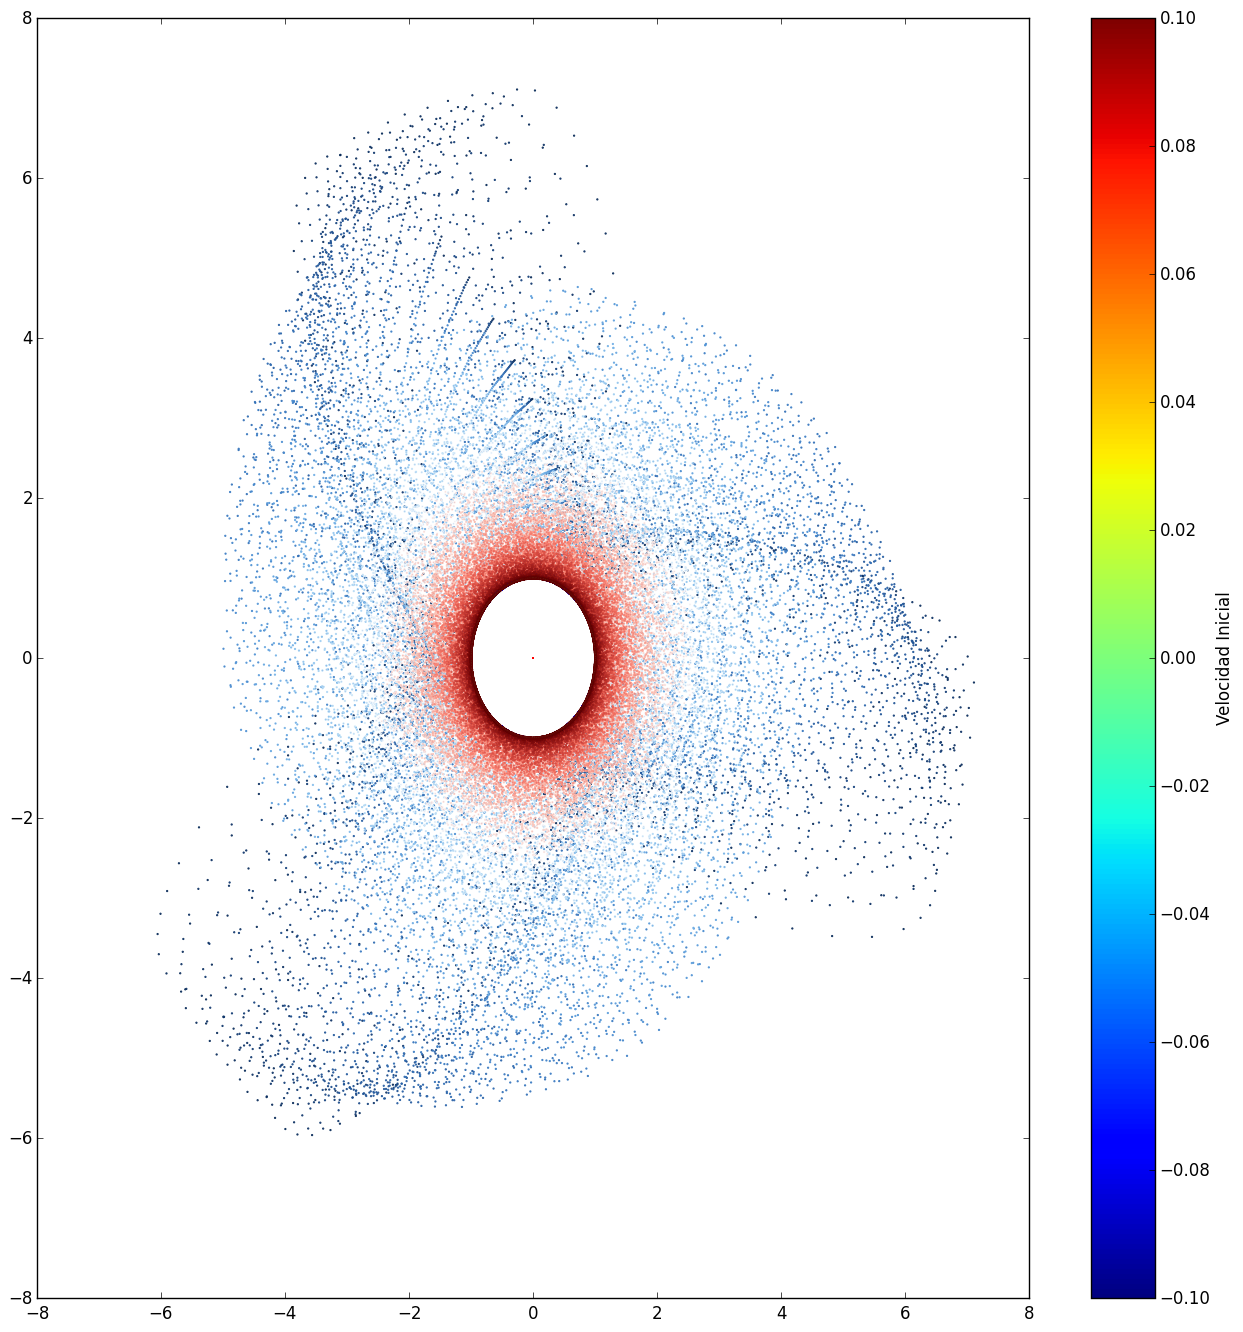

In [90]:
par = [1.0:-0.01:0.0]
paleta_luna = colormap("RdBu", length(par))

fig = figure("Title of Window",figsize=(16,16))
for i in 1:length(par)
    
    CondicionesLuna = iniciar(MasaLuna, PosicionInicialLuna, [0., VelocidadTraslacional_TierraSol+par[i], 0.])
    CondicionesIniciales = typeof(CondicionesSol)[CondicionesSol, CondicionesTierra, CondicionesLuna]
    t, Cuerpo1, Cuerpo2, Cuerpo3 = Integrador3(CondicionesIniciales, 300.)
    
    Px1 = [pos[1] for pos in Cuerpo1[1]] 
    Px2 = [pos[1] for pos in Cuerpo2[1]]
    Px3 = [pos[1] for pos in Cuerpo3[1]]
    
    Py1 = [pos[2] for pos in Cuerpo1[1]] 
    Py2 = [pos[2] for pos in Cuerpo2[1]]
    Py3 = [pos[2] for pos in Cuerpo3[1]]

    Pz1 = [pos[3] for pos in Cuerpo1[1]] 
    Pz2 = [pos[3] for pos in Cuerpo2[1]]
    Pz3 = [pos[3] for pos in Cuerpo3[1]]
    
    Energia_3(Cuerpo1, Cuerpo2, Cuerpo3, [MasaSol, MasaTierra, MasaLuna]) 
    c_par = [ones(Py3)*par[i]]
    o = paleta_luna[length(paleta_luna)-i+1]
    rgb_o = [comp1(o), comp2(o), comp3(o)]
    
    p1=scatter(Px1, Py1, marker=".", s=0.6, color = "red", label="Sol")
    p2=scatter(Px2, Py2,   marker=".", s=0.4, color = "blue", label="Tierra")
    p3=scatter(Px3, Py3, c=c_par, color=rgb_o, marker=".", s=1.5, label="Luna")
    
    #show()

end

cb = colorbar()
cb[:"set_label"]("Velocidad Inicial")

Hacemos un refinamiento...

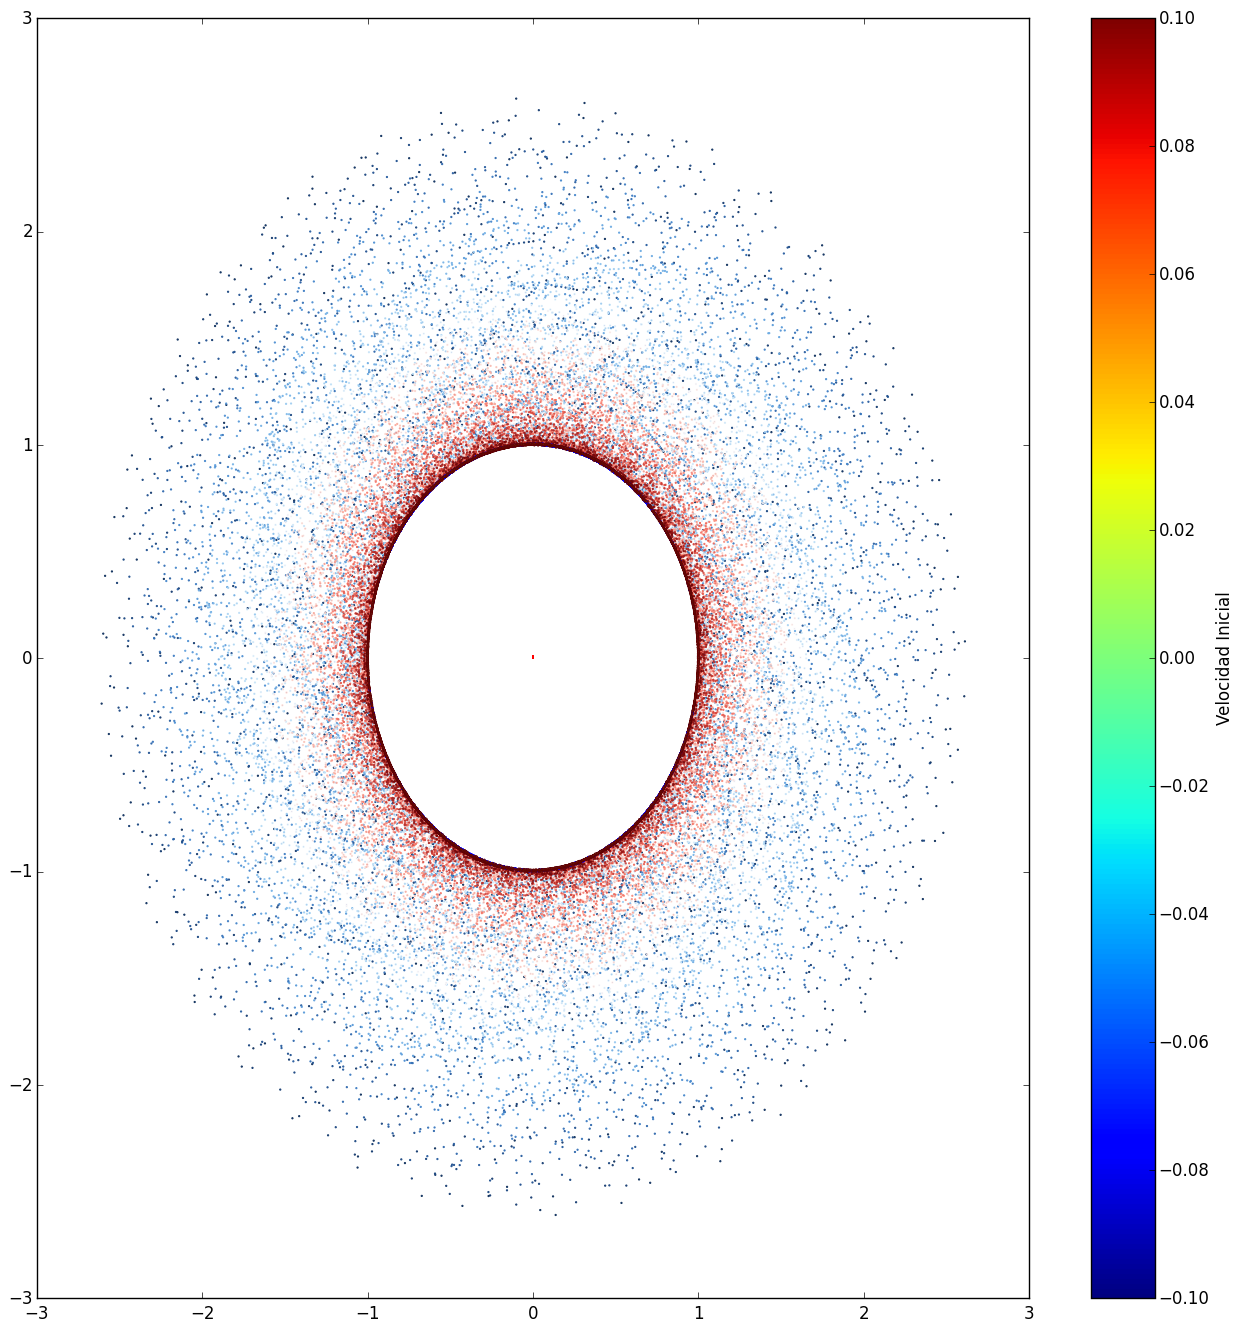

In [59]:
par = [0.5:-0.01:0.0]
paleta_luna = colormap("RdBu", length(par))

fig = figure("Title of Window",figsize=(16,16))
for i in 1:length(par)
    
    CondicionesLuna = iniciar(MasaLuna, PosicionInicialLuna, [0., VelocidadTraslacional_TierraSol+par[i], 0.])
    CondicionesIniciales = typeof(CondicionesSol)[CondicionesSol, CondicionesTierra, CondicionesLuna]
    t, Cuerpo1, Cuerpo2, Cuerpo3 = Integrador3(CondicionesIniciales, 1000.)
    
    Px1 = [pos[1] for pos in Cuerpo1[1]] 
    Px2 = [pos[1] for pos in Cuerpo2[1]]
    Px3 = [pos[1] for pos in Cuerpo3[1]]
    
    Py1 = [pos[2] for pos in Cuerpo1[1]] 
    Py2 = [pos[2] for pos in Cuerpo2[1]]
    Py3 = [pos[2] for pos in Cuerpo3[1]]

    Pz1 = [pos[3] for pos in Cuerpo1[1]] 
    Pz2 = [pos[3] for pos in Cuerpo2[1]]
    Pz3 = [pos[3] for pos in Cuerpo3[1]]
    
    Energia_3(Cuerpo1, Cuerpo2, Cuerpo3, [MasaSol, MasaTierra, MasaLuna]) 
    c_par = [ones(Py3)*par[i]]
    o = paleta_luna[length(paleta_luna)-i+1]
    rgb_o = [comp1(o), comp2(o), comp3(o)]
    
    p1=scatter(Px1, Py1, marker=".", s=0.6, color = "red", label="Sol")
    p2=scatter(Px2, Py2,   marker=".", s=0.4, color = "blue", label="Tierra")
    p3=scatter(Px3, Py3, c=c_par, color=rgb_o, marker=".", s=1.5, label="Luna")
    
    #show()

end

cb = colorbar()
cb[:"set_label"]("Velocidad Inicial")

Y observamos que para ciertos valores del parámetro inicial, las posiciones se concentran.
Hacemos un refinamiento más.

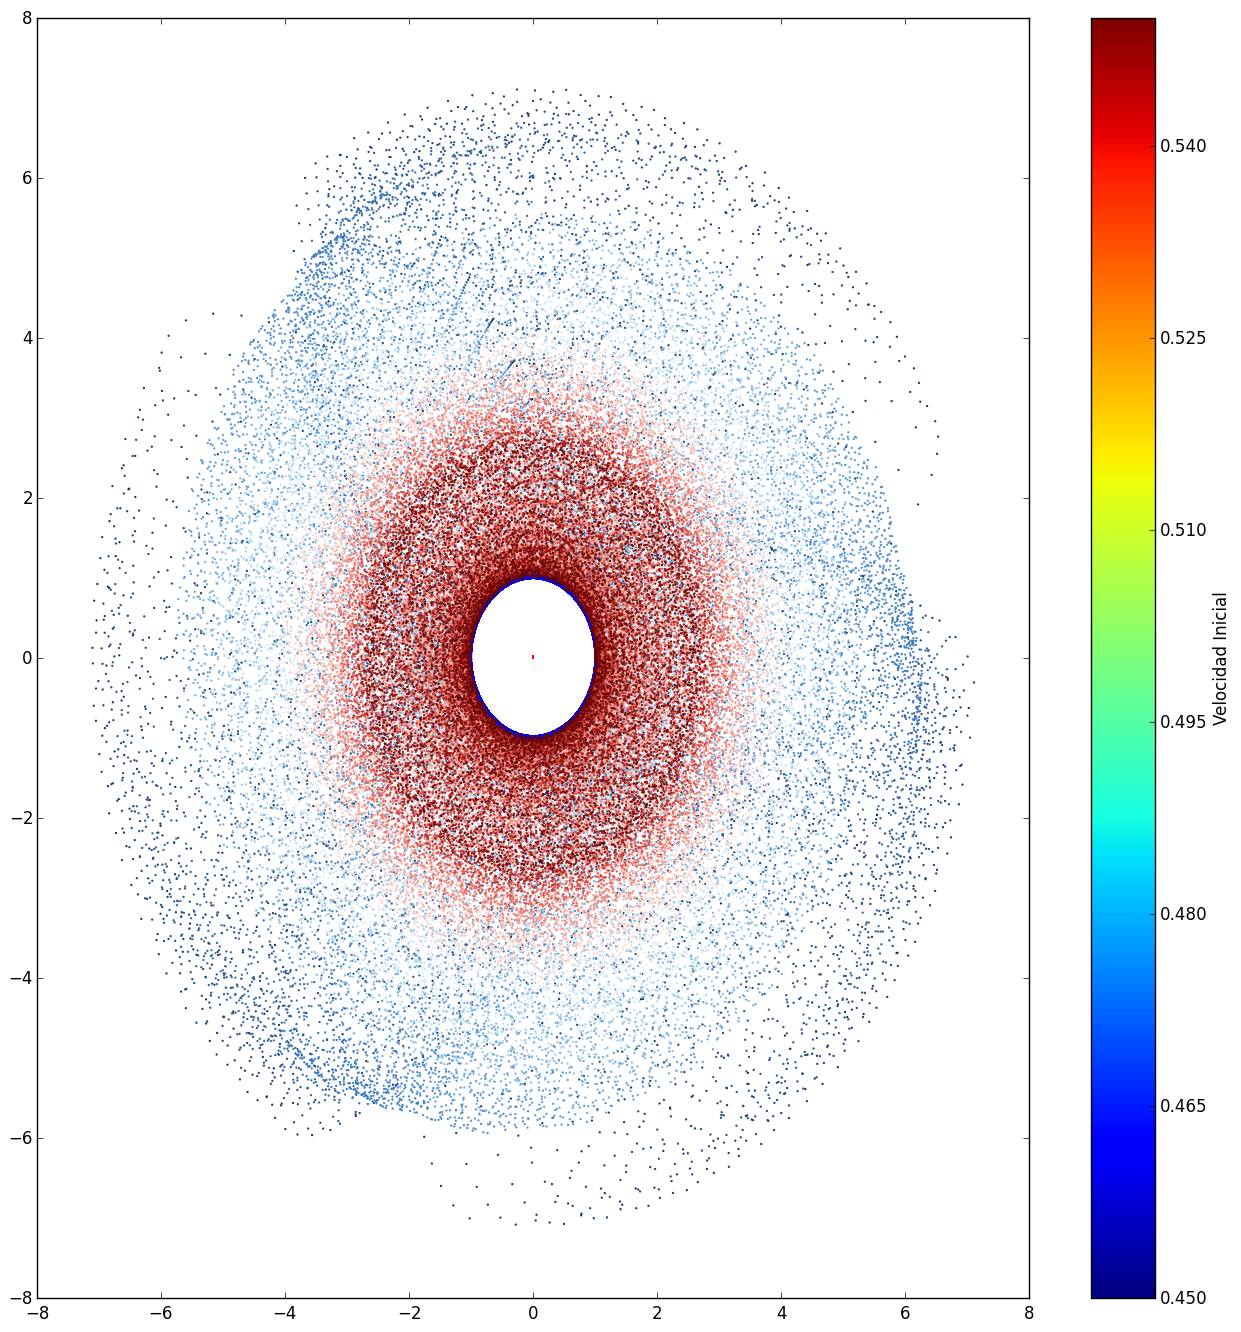

In [88]:
par = [1.0:-0.01:0.5]
paleta_luna = colormap("RdBu", length(par))

fig = figure("Title of Window",figsize=(16,16))
for i in 1:length(par)
    
    CondicionesLuna = iniciar(MasaLuna, PosicionInicialLuna, [0., VelocidadTraslacional_TierraSol+par[i], 0.])
    CondicionesIniciales = typeof(CondicionesSol)[CondicionesSol, CondicionesTierra, CondicionesLuna]
    t, Cuerpo1, Cuerpo2, Cuerpo3 = Integrador3(CondicionesIniciales, 1000.)
    
    Px1 = [pos[1] for pos in Cuerpo1[1]] 
    Px2 = [pos[1] for pos in Cuerpo2[1]]
    Px3 = [pos[1] for pos in Cuerpo3[1]]
    
    Py1 = [pos[2] for pos in Cuerpo1[1]] 
    Py2 = [pos[2] for pos in Cuerpo2[1]]
    Py3 = [pos[2] for pos in Cuerpo3[1]]

    Pz1 = [pos[3] for pos in Cuerpo1[1]] 
    Pz2 = [pos[3] for pos in Cuerpo2[1]]
    Pz3 = [pos[3] for pos in Cuerpo3[1]]
    
    Energia_3(Cuerpo1, Cuerpo2, Cuerpo3, [MasaSol, MasaTierra, MasaLuna]) 
    c_par = [ones(Py3)*par[i]]
    o = paleta_luna[length(paleta_luna)-i+1]
    rgb_o = [comp1(o), comp2(o), comp3(o)]
    
    p1=scatter(Px1, Py1, marker=".", s=0.6, color = "red", label="Sol")
    p2=scatter(Px2, Py2,   marker=".", s=0.4, color = "blue", label="Tierra")
    p3=scatter(Px3, Py3, c=c_par, color=rgb_o, marker=".", s=1.5, label="Luna")
    
    #show()

end

cb = colorbar()
cb[:"set_label"]("Velocidad Inicial")

No obtuvimos patrones muy distintos. Exploramos el resto del intervalo.

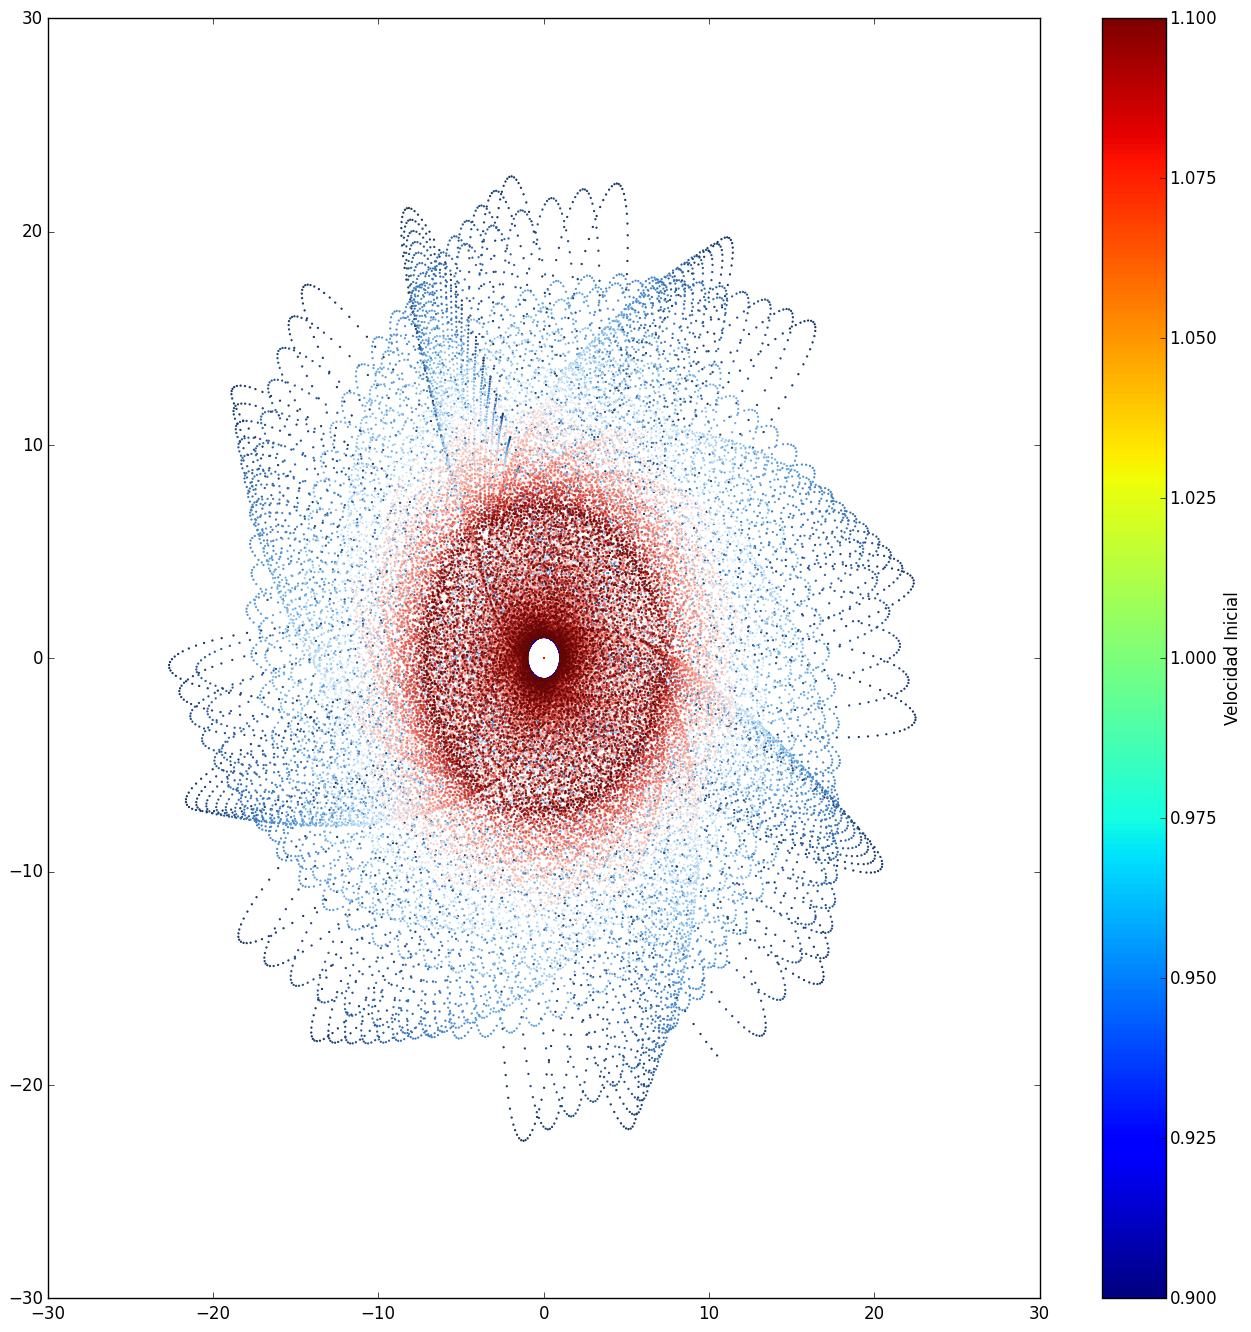

In [89]:
par = [1.5:-0.01:1.0]
paleta_luna = colormap("RdBu", length(par))

fig = figure("Title of Window",figsize=(16,16))
for i in 1:length(par)
    
    CondicionesLuna = iniciar(MasaLuna, PosicionInicialLuna, [0., VelocidadTraslacional_TierraSol+par[i], 0.])
    CondicionesIniciales = typeof(CondicionesSol)[CondicionesSol, CondicionesTierra, CondicionesLuna]
    t, Cuerpo1, Cuerpo2, Cuerpo3 = Integrador3(CondicionesIniciales, 1000.)
    
    Px1 = [pos[1] for pos in Cuerpo1[1]] 
    Px2 = [pos[1] for pos in Cuerpo2[1]]
    Px3 = [pos[1] for pos in Cuerpo3[1]]
    
    Py1 = [pos[2] for pos in Cuerpo1[1]] 
    Py2 = [pos[2] for pos in Cuerpo2[1]]
    Py3 = [pos[2] for pos in Cuerpo3[1]]

    Pz1 = [pos[3] for pos in Cuerpo1[1]] 
    Pz2 = [pos[3] for pos in Cuerpo2[1]]
    Pz3 = [pos[3] for pos in Cuerpo3[1]]
    
    Energia_3(Cuerpo1, Cuerpo2, Cuerpo3, [MasaSol, MasaTierra, MasaLuna]) 
    c_par = [ones(Py3)*par[i]]
    o = paleta_luna[length(paleta_luna)-i+1]
    rgb_o = [comp1(o), comp2(o), comp3(o)]
    
    p1=scatter(Px1, Py1, marker=".", s=0.6, color = "red", label="Sol")
    p2=scatter(Px2, Py2,   marker=".", s=0.4, color = "blue", label="Tierra")
    p3=scatter(Px3, Py3, c=c_par, color=rgb_o, marker=".", s=1.5, label="Luna")
    
    #show()

end

cb = colorbar()
cb[:"set_label"]("Velocidad Inicial")

Aparecen ciertos patrones repetitivos que asociamos con la presencia de órbitas semi-periódicas.
Realizamos un nuevo refinamiento, entre 1.8 y 1.70.

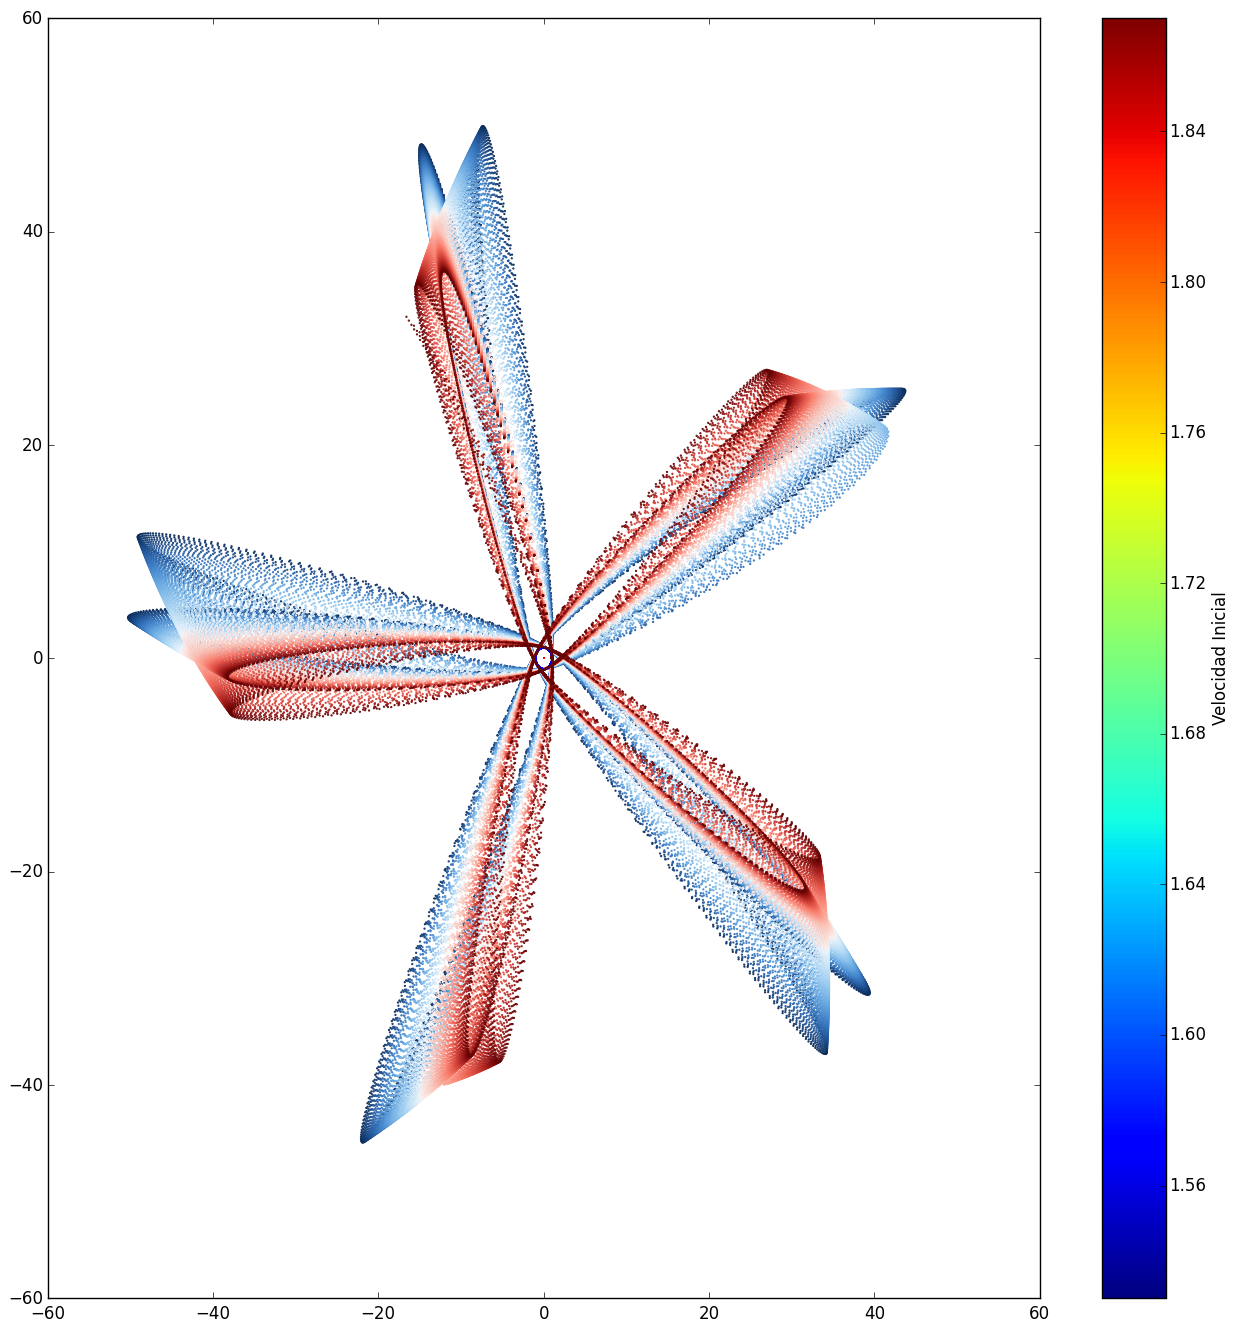

In [87]:
par = [1.8:-0.001:1.70]
paleta_luna = colormap("RdBu", length(par))

fig = figure("Title of Window",figsize=(16,16))
for i in 1:length(par)
    
    CondicionesLuna = iniciar(MasaLuna, PosicionInicialLuna, [0., VelocidadTraslacional_TierraSol+par[i], 0.])
    CondicionesIniciales = typeof(CondicionesSol)[CondicionesSol, CondicionesTierra, CondicionesLuna]
    t, Cuerpo1, Cuerpo2, Cuerpo3 = Integrador3(CondicionesIniciales, 1000.)
    
    Px1 = [pos[1] for pos in Cuerpo1[1]] 
    Px2 = [pos[1] for pos in Cuerpo2[1]]
    Px3 = [pos[1] for pos in Cuerpo3[1]]
    
    Py1 = [pos[2] for pos in Cuerpo1[1]] 
    Py2 = [pos[2] for pos in Cuerpo2[1]]
    Py3 = [pos[2] for pos in Cuerpo3[1]]

    Pz1 = [pos[3] for pos in Cuerpo1[1]] 
    Pz2 = [pos[3] for pos in Cuerpo2[1]]
    Pz3 = [pos[3] for pos in Cuerpo3[1]]
    
    Energia_3(Cuerpo1, Cuerpo2, Cuerpo3, [MasaSol, MasaTierra, MasaLuna]) 
    c_par = [ones(Py3)*par[i]]
    o = paleta_luna[length(paleta_luna)-i+1]
    rgb_o = [comp1(o), comp2(o), comp3(o)]
    
    p1=scatter(Px1, Py1, marker=".", s=0.6, color = "red", label="Sol")
    p2=scatter(Px2, Py2,   marker=".", s=0.4, color = "blue", label="Tierra")
    p3=scatter(Px3, Py3, c=c_par, color=rgb_o, marker=".", s=1.5, label="Luna")
    
    #show()

end

cb = colorbar()
cb[:"set_label"]("Velocidad Inicial")

Esta característica se hace más evidente.

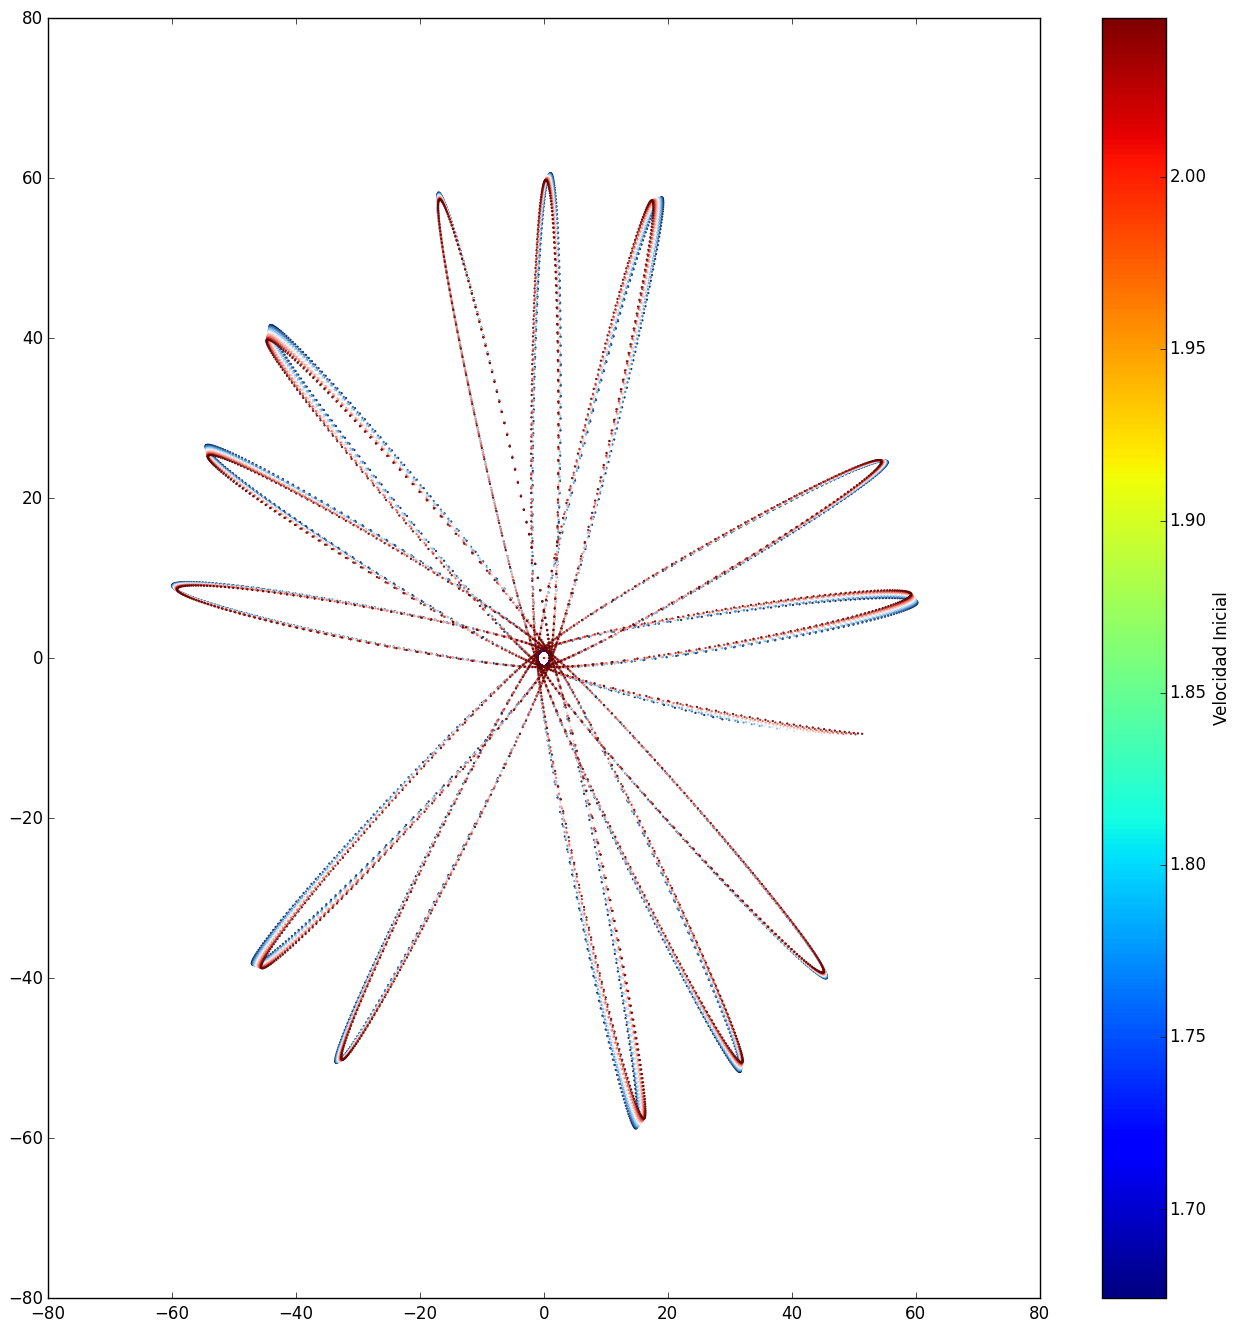

In [95]:
par = [1.865:-0.0005:1.86]
paleta_luna = colormap("RdBu", length(par))

fig = figure("Title of Window",figsize=(16,16))
for i in 1:length(par)
    
    CondicionesLuna = iniciar(MasaLuna, PosicionInicialLuna, [0., VelocidadTraslacional_TierraSol+par[i], 0.])
    CondicionesIniciales = typeof(CondicionesSol)[CondicionesSol, CondicionesTierra, CondicionesLuna]
    t, Cuerpo1, Cuerpo2, Cuerpo3 = Integrador3(CondicionesIniciales, 2000.)
    
    Px1 = [pos[1] for pos in Cuerpo1[1]] 
    Px2 = [pos[1] for pos in Cuerpo2[1]]
    Px3 = [pos[1] for pos in Cuerpo3[1]]
    
    Py1 = [pos[2] for pos in Cuerpo1[1]] 
    Py2 = [pos[2] for pos in Cuerpo2[1]]
    Py3 = [pos[2] for pos in Cuerpo3[1]]

    Pz1 = [pos[3] for pos in Cuerpo1[1]] 
    Pz2 = [pos[3] for pos in Cuerpo2[1]]
    Pz3 = [pos[3] for pos in Cuerpo3[1]]
    
    Energia_3(Cuerpo1, Cuerpo2, Cuerpo3, [MasaSol, MasaTierra, MasaLuna]) 
    c_par = [ones(Py3)*par[i]]
    o = paleta_luna[length(paleta_luna)-i+1]
    rgb_o = [comp1(o), comp2(o), comp3(o)]
    
    p1=scatter(Px1, Py1, marker=".", s=0.6, color = "red", label="Sol")
    p2=scatter(Px2, Py2,   marker=".", s=0.4, color = "blue", label="Tierra")
    p3=scatter(Px3, Py3, c=c_par, color=rgb_o, marker=".", s=1.5, label="Luna")
    
    #show()

end

cb = colorbar()
cb[:"set_label"]("Velocidad Inicial")

Para una velocidad iniciar de 1.865, parece completarse una onda cuasi-periòdica.

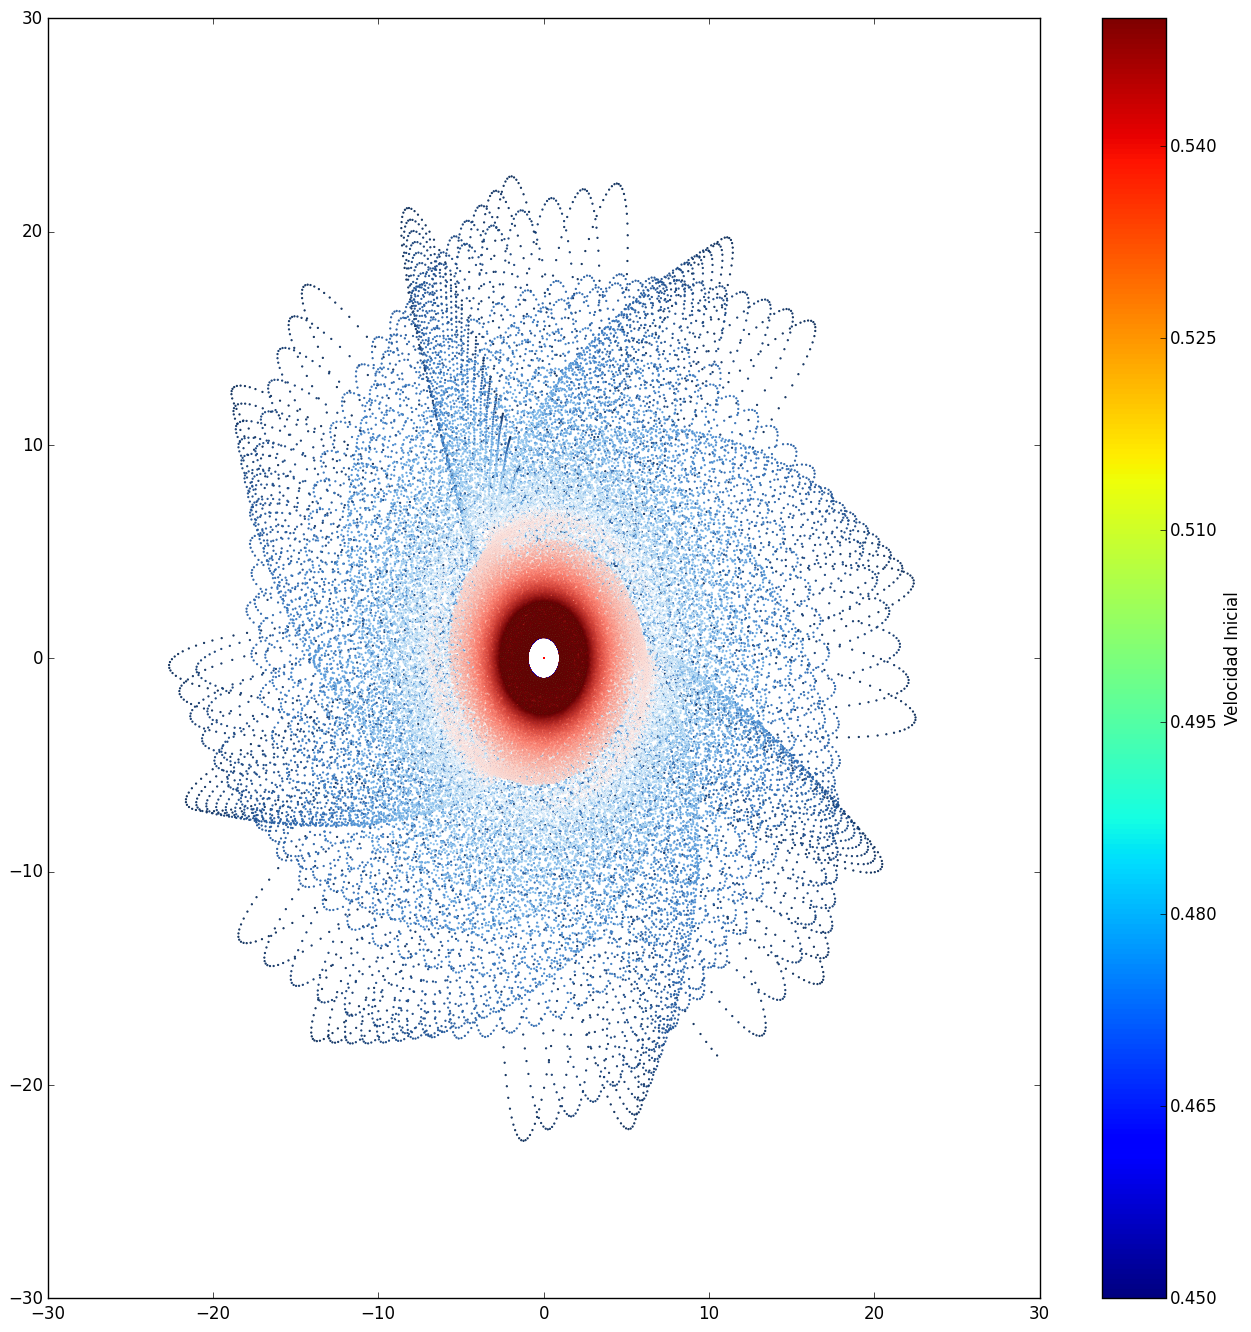

In [79]:
par = [1.5:-0.01:0.5]
paleta_luna = colormap("RdBu", length(par))

fig = figure("Title of Window",figsize=(16,16))
for i in 1:length(par)
    
    CondicionesLuna = iniciar(MasaLuna, PosicionInicialLuna, [0., VelocidadTraslacional_TierraSol+par[i], 0.])
    CondicionesIniciales = typeof(CondicionesSol)[CondicionesSol, CondicionesTierra, CondicionesLuna]
    t, Cuerpo1, Cuerpo2, Cuerpo3 = Integrador3(CondicionesIniciales, 1000.)
    
    Px1 = [pos[1] for pos in Cuerpo1[1]] 
    Px2 = [pos[1] for pos in Cuerpo2[1]]
    Px3 = [pos[1] for pos in Cuerpo3[1]]
    
    Py1 = [pos[2] for pos in Cuerpo1[1]] 
    Py2 = [pos[2] for pos in Cuerpo2[1]]
    Py3 = [pos[2] for pos in Cuerpo3[1]]

    Pz1 = [pos[3] for pos in Cuerpo1[1]] 
    Pz2 = [pos[3] for pos in Cuerpo2[1]]
    Pz3 = [pos[3] for pos in Cuerpo3[1]]
    
    e=Energia_3(Cuerpo1, Cuerpo2, Cuerpo3, [MasaSol, MasaTierra, MasaLuna]) 
    c_par = [ones(Py3)*par[i]]
    o = paleta_luna[length(paleta_luna)-i+1]
    rgb_o = [comp1(o), comp2(o), comp3(o)]
    
    p1=scatter(Px1, Py1, marker=".", s=0.6, color = "red", label="Sol")
    p2=scatter(Px2, Py2,   marker=".", s=0.4, color = "blue", label="Tierra")
    p3=scatter(Px3, Py3, c=c_par, color=rgb_o, marker=".", s=1.5, label="Luna")
    
    #show()

end

cb = colorbar()
cb[:"set_label"]("Velocidad Inicial")